### Important: Set up directories
Set `WORK_DIR` to the path to the repo in the cell below:

In [1]:
import os
WORK_DIR = os.path.join(os.getenv("HOME"), 'text-gnn')
WORK_DIR = '/Users/tyler/Documents/programming/africa_nlp/text-gnn'
os.chdir(WORK_DIR)

In [2]:
import pandas as pd
%load_ext autoreload
%autoreload 2
import sys
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import torch
import matplotlib.pyplot as plt

sys.path.append('src')
from src.shared.utils import read_json_as_dict

## Load data
Set the `PREPROC_DIR_NAME` variable to the directory name

In [3]:
PREPROC_DIR_NAME = 'z_news_test'

In [4]:
preproc_dir = os.path.join(WORK_DIR, 'results', PREPROC_DIR_NAME)

In [5]:
df = pd.read_csv(f'{preproc_dir}/dataset.csv',sep=';')

In [6]:
train_nodes = torch.load(os.path.join(preproc_dir,'train-indices.pt'))
train_labels = torch.load(os.path.join(preproc_dir,'train-labels.pt'))

val_nodes = torch.load(os.path.join(preproc_dir, 'val-indices.pt'))
val_labels = torch.load(os.path.join(preproc_dir, 'val-labels.pt'))

labels = read_json_as_dict(os.path.join(preproc_dir, 'labels.json'))
idx2label = {item:key for (key,item) in labels.items()}

In [7]:
label_fractions = df.label_idx.value_counts(normalize=True).to_frame()
label_fractions.columns = ['original']

name_list = ['train','val']
nodes_list = [train_nodes,val_nodes]
for name,nodes in zip(name_list,nodes_list):
    label_fractions_subset = df[df.document_idx.isin(nodes)].label_idx.value_counts(normalize=True).to_frame().rename({'label_idx':name},axis=1)
    label_fractions = pd.merge(label_fractions,label_fractions_subset,left_index=True,right_index=True)

label_fractions.index = label_fractions.index.map(idx2label)

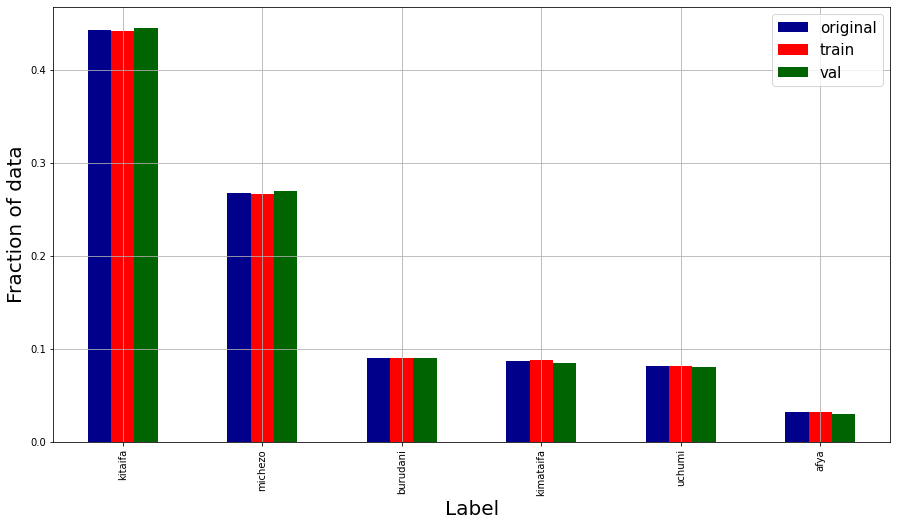

In [8]:
label_fractions.plot(kind='bar',color=['darkblue','red','darkgreen'])
plt.grid(which="both")
plt.legend(fontsize=15)
fig,ax = plt.gcf(),plt.gca()

ax.set_xlabel("Label", size=20)
ax.set_ylabel("Fraction of data", size=20)
fig.set_size_inches(15, 8)
plt.savefig(os.path.join(preproc_dir,'label_fractions.jpg'), dpi=200)